## Mini-project DADS5001 
#### Adcharaporn 6420412011

In [1]:
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
"""import seaborn as sns
sns.set()"""

'import seaborn as sns\nsns.set()'

In [2]:
#import
df_datadead = pd.read_csv("tbl_rtddi_filter_data.csv")

df_datadead

C:\Users\WINDOWS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,8,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,DEAD_YEAR(Budha),DEAD_YEAR,Age,Sex,NationalityId,Tumbol,District,Province,RiskHelmet,...,AccSubDist,AccDist,AccProv,AccLat,AccLong,ICD-10,Vehicle,Unnamed: 21,DeadDate.1,MonthDate
0,8596637,2554,2011,16.0,1.0,99.0,คลองขนาน,เหนือคลอง,กบ,NaN,...,คลองขนาน,เหนือคลอง,กระบี่,8.013613,99.002554,V299,รถจักรยานยนต์,NaN,5,1
1,8596636,2554,2011,14.0,1.0,99.0,เกาะศรีบอยา,เหนือคลอง,กบ,NaN,...,คลองขนาน,เหนือคลอง,กระบี่,8.013613,99.002554,V299,รถจักรยานยนต์,NaN,5,1
2,8609447,2554,2011,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,กระบี่,NaN,NaN,NaN,ไม่ระบุพาหนะ,NaN,14,1
3,8603763,2554,2011,NaN,1.0,NaN,ปลายพระยา,ปลายพระยา,กบ,NaN,...,ปลายพระยา,ปลายพระยา,กระบี่,8.532753,98.862684,NaN,ไม่ระบุพาหนะ,NaN,14,1
4,8596708,2554,2011,38.0,1.0,99.0,เขาทอง,เมืองกระบี่,กบ,NaN,...,ทับปริก,เมืองกระบี่,กระบี่,8.142938,98.891667,V899,ไม่ระบุพาหนะ,NaN,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232164,11417633,2565,2022,16.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,อุบลราชธานี,15.235362,105.226675,V892,ไม่ระบุพาหนะ,NaN,19,6
232165,11417640,2565,2022,62.0,1.0,Thai,NaN,สำโรง,อุบลราชธานี,NaN,...,สำโรง,สำโรง,อุบลราชธานี,NaN,NaN,V892,รถจักรยานยนต์,NaN,20,6
232166,11417635,2565,2022,29.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,อุบลราชธานี,14.980800,105.173074,V892,รถจักรยานยนต์,NaN,20,6
232167,11422569,2565,2022,23.0,1.0,Thai,NaN,NaN,NaN,NaN,...,กลางใหญ่,เขื่องใน,อุบลราชธานี,15.507605,104.420276,NaN,รถจักรยานยนต์,NaN,25,6


In [3]:
df_select = df_datadead.loc[:,['DEAD_YEAR','Age','Sex','AccProv','Vehicle','MonthDate']]

df_selectyear = df_select.loc [ (df_select['DEAD_YEAR'] >= 2018) & (df_select['DEAD_YEAR'] >= 2018), : ]
df_selectvehicle = df_selectyear.loc [ (df_selectyear['Vehicle'] == 'รถจักรยานยนต์') | (df_selectyear['Vehicle']=='รถยนต์' ) ]
#select_year = df_select.loc[:,(df_select['DEAD_YEAR'])>=2018 & ['DEAD_YEAR']<=2022]
df_selectvehicle.isnull().sum()   #check null


DEAD_YEAR       0
Age           607
Sex          3356
AccProv         0
Vehicle         0
MonthDate       0
dtype: int64

In [4]:
df = df_selectvehicle.dropna()
df.isnull().sum()    #ค่า null เป็น 0 

#_____________________ clean ok _______________#

DEAD_YEAR    0
Age          0
Sex          0
AccProv      0
Vehicle      0
MonthDate    0
dtype: int64

In [5]:
df.loc[ df['Sex']==1.0 , 'Sex' ] = 'Male'
df.loc[ df['Sex']==2.0 , 'Sex' ] = 'Female'

month = ['January','February','March','April','May','June','July','August','September','October','November','December']
df.loc[ df['MonthDate']== 1  , 'MonthDate'] = 'January'
df.loc[df['MonthDate']== 2  , 'MonthDate'] = 'February'
df.loc[df['MonthDate']== 3  , 'MonthDate'] = 'March'
df.loc[df['MonthDate']== 4  , 'MonthDate'] = 'April'
df.loc[df['MonthDate']== 5  , 'MonthDate'] = 'May'
df.loc[df['MonthDate']== 6  , 'MonthDate'] = 'June'
df.loc[df['MonthDate']== 7  , 'MonthDate'] = 'July'
df.loc[df['MonthDate']== 8  , 'MonthDate'] = 'August'
df.loc[df['MonthDate']== 9  , 'MonthDate'] = 'September'
df.loc[df['MonthDate']== 10  , 'MonthDate'] = 'October'
df.loc[df['MonthDate']== 11  , 'MonthDate'] = 'November'
df.loc[df['MonthDate']== 12  , 'MonthDate'] = 'December'

df

C:\Users\WINDOWS\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,DEAD_YEAR,Age,Sex,AccProv,Vehicle,MonthDate
148922,2018,9.0,Male,กระบี่,รถยนต์,January
148923,2018,20.0,Male,กระบี่,รถจักรยานยนต์,January
148924,2018,25.0,Female,กระบี่,รถจักรยานยนต์,January
148925,2018,29.0,Male,กระบี่,รถจักรยานยนต์,January
148926,2018,18.0,Male,กระบี่,รถจักรยานยนต์,January
...,...,...,...,...,...,...
232160,2022,21.0,Male,อุบลราชธานี,รถจักรยานยนต์,June
232163,2022,67.0,Male,อุบลราชธานี,รถจักรยานยนต์,June
232165,2022,62.0,Male,อุบลราชธานี,รถจักรยานยนต์,June
232166,2022,29.0,Male,อุบลราชธานี,รถจักรยานยนต์,June


In [6]:
#2018s 
select_year2018 = df.loc[df["DEAD_YEAR"]==2018]

groupby_year2018 = select_year2018.groupby(['DEAD_YEAR'])
groupby_sex2018 = select_year2018.groupby(['Sex'])
groupby_vehicle2018 = select_year2018.groupby(['Vehicle'])
groupby_month2018 = select_year2018.groupby(['MonthDate'])

count_year2018 = groupby_year2018.size()
count_sex2018 = groupby_sex2018.size()
count_vehicle2018 = groupby_vehicle2018.size()
count_month2018 = groupby_month2018.size()

print(f"{count_sex2018}\n\n{count_vehicle2018}\n\n{count_month2018}")

Sex
Female    2186
Male      8466
dtype: int64

Vehicle
รถจักรยานยนต์    9580
รถยนต์           1072
dtype: int64

MonthDate
April         988
August        764
December      924
February      998
January      1037
July          780
June          805
March        1042
May           853
November      932
October       770
September     759
dtype: int64


In [7]:
#2019
select_year2019 = df.loc[df["DEAD_YEAR"]==2019]

groupby_year2019 = select_year2019.groupby(['DEAD_YEAR'])
groupby_sex2019 = select_year2019.groupby(['Sex'])
groupby_vehicle2019 = select_year2019.groupby(['Vehicle'])
groupby_month2019 = select_year2019.groupby(['MonthDate'])

count_year2019 = groupby_year2019.size()
count_sex2019 = groupby_sex2019.size()
count_vehicle2019 = groupby_vehicle2019.size()
count_month2019 = groupby_month2019.size()

print(f"{count_sex2019}\n\n{count_vehicle2019}\n\n{count_month2019}")

Sex
Female    2298
Male      8679
dtype: int64

Vehicle
รถจักรยานยนต์    9948
รถยนต์           1029
dtype: int64

MonthDate
April        1009
August        837
December      843
February      966
January      1075
July          885
June          940
March        1039
May           875
November      848
October       847
September     813
dtype: int64


In [8]:
#2020
select_year20 = df.loc[df["DEAD_YEAR"]==2020]

groupby_year20 = select_year20.groupby(['DEAD_YEAR'])
groupby_sex20 = select_year20.groupby(['Sex'])
groupby_vehicle20 = select_year20.groupby(['Vehicle'])
groupby_month20 = select_year20.groupby(['MonthDate'])

count_year20 = groupby_year20.size()
count_sex20 = groupby_sex20.size()
count_vehicle20 = groupby_vehicle20.size()
count_month20 = groupby_month20.size()

print(f"{count_sex20}\n\n{count_vehicle20}\n\n{count_month20}")

Sex
Female    2273
Male      9128
dtype: int64

Vehicle
รถจักรยานยนต์    9194
รถยนต์           2207
dtype: int64

MonthDate
April         579
August        950
December     1171
February     1026
January      1055
July          928
June          822
March        1050
May           837
November     1094
October       986
September     903
dtype: int64


In [9]:
#2021
select_year21 = df.loc[df["DEAD_YEAR"]==2021]

groupby_year21 = select_year21.groupby(['DEAD_YEAR'])
groupby_sex21 = select_year21.groupby(['Sex'])
groupby_vehicle21 = select_year21.groupby(['Vehicle'])
groupby_month21 = select_year21.groupby(['MonthDate'])

count_year21 = groupby_year21.size()
count_sex21 = groupby_sex21.size()
count_vehicle21 = groupby_vehicle21.size()
count_month21 = groupby_month21.size()

print(f"{count_sex21}\n\n{count_vehicle21}\n\n{count_month21}")

Sex
Female    1734
Male      6575
dtype: int64

Vehicle
รถจักรยานยนต์    7476
รถยนต์            833
dtype: int64

MonthDate
April        726
August       584
December     822
February     807
January      688
July         588
June         590
March        908
May          651
November     787
October      631
September    527
dtype: int64


In [10]:
#2022
select_year22 = df.loc[df["DEAD_YEAR"]==2022]

groupby_year22 = select_year22.groupby(['DEAD_YEAR'])
groupby_sex22 = select_year22.groupby(['Sex'])
groupby_vehicle22 = select_year22.groupby(['Vehicle'])
groupby_month22 = select_year22.groupby(['MonthDate'])

count_year22 = groupby_year22.size()
count_sex22 = groupby_sex22.size()
count_vehicle22 = groupby_vehicle22.size()
count_month22 = groupby_month22.size()

print(f"{count_sex22}\n\n{count_vehicle22}\n\n{count_month22}")

Sex
Female    1158
Male      4086
dtype: int64

Vehicle
รถจักรยานยนต์    4689
รถยนต์            555
dtype: int64

MonthDate
April       920
February    832
January     925
June        809
March       902
May         856
dtype: int64


[9580, 9948, 9194, 7476, 4689] 
 [1072, 1029, 2207, 833, 555]


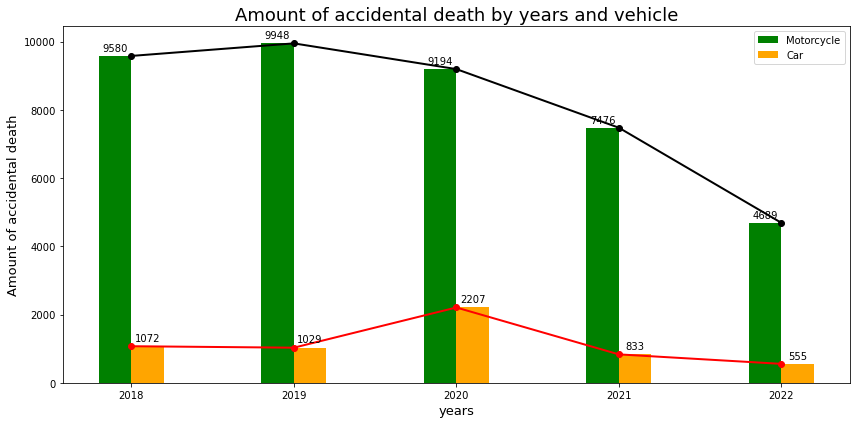

In [11]:
#plot mix 2018-2022 
motor = [count_vehicle2018[0],count_vehicle2019[0],count_vehicle20[0],count_vehicle21[0],count_vehicle22[0]]
car = [count_vehicle2018[1],count_vehicle2019[1],count_vehicle20[1],count_vehicle21[1],count_vehicle22[1]]

print(motor,"\n",car)

x = [ i for i in range(2018,2023) ]
X_len = np.arange(len(x))

fig,ax = plt.subplots(figsize=(12,6))
#plt.figure(figsize=(18,6))

rects1 = ax.bar(X_len-0.1,motor,0.2,label = 'Motorcycle',color = 'green')
rects2 = ax.bar(X_len+0.1,car,0.2,label = 'Car',color = 'orange')

plt.title('Amount of accidental death by years and vehicle', fontsize = 18)
plt.xlabel('years',fontsize = 13)
plt.ylabel('Amount of accidental death',fontsize = 13)
plt.xticks(X_len,x)
ax.legend()
plt.plot(X_len,motor,marker = 'o',linewidth=2.0,color = 'black')
plt.plot(X_len,car,marker = 'o',linewidth=2.0,color = 'red')
#plt.scatter(X_len,motor)

def plot_test(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plot_test(rects1)
plot_test(rects2)

fig.tight_layout()
plt.show()

In [16]:
# Add a dummy column containing an empty string
df[ 'Age_group' ] = ''
df
#จำแนกอายุให้อยู่ตามกลุ่มต่างๆ

select_year22 = df.loc[df["DEAD_YEAR"]==2022]
select_year22.loc[ (df['Age'] >= 0.0)& (df['Age'] <= 8.0),'Age_group'] = 'ช่วงอายุไม่เกิน 8 ปี'
select_year22.loc[ (df['Age'] >= 9.0)& (df['Age'] <= 24.0),'Age_group'] = 'อายุ 9-24 ปี'
select_year22.loc[ (df['Age'] >= 25.0)& (df['Age'] <= 40.0),'Age_group'] = 'อายุ 25-40 ปี'
select_year22.loc[ (df['Age'] >= 41.0)& (df['Age'] <= 56.0),'Age_group'] = 'อายุ 41-56 ปี'
select_year22.loc[ (df['Age'] >= 57.0) ,'Age_group'] = 'ช่วงอายุมากกว่า 56 ปี'

select_year22


C:\Users\WINDOWS\AppData\Local\Temp/ipykernel_6088/2629669783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ 'Age_group' ] = ''
C:\Users\WINDOWS\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,DEAD_YEAR,Age,Sex,AccProv,Vehicle,MonthDate,Age_group
223545,2022,56.0,Male,กระบี่,รถจักรยานยนต์,January,อายุ 41-56 ปี
223546,2022,66.0,Male,กระบี่,รถจักรยานยนต์,January,ช่วงอายุมากกว่า 56 ปี
223547,2022,21.0,Male,กระบี่,รถยนต์,January,อายุ 9-24 ปี
223549,2022,22.0,Male,กระบี่,รถจักรยานยนต์,January,อายุ 9-24 ปี
223550,2022,58.0,Male,กระบี่,รถจักรยานยนต์,January,ช่วงอายุมากกว่า 56 ปี
...,...,...,...,...,...,...,...
232160,2022,21.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,อายุ 9-24 ปี
232163,2022,67.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,ช่วงอายุมากกว่า 56 ปี
232165,2022,62.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,ช่วงอายุมากกว่า 56 ปี
232166,2022,29.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,อายุ 25-40 ปี


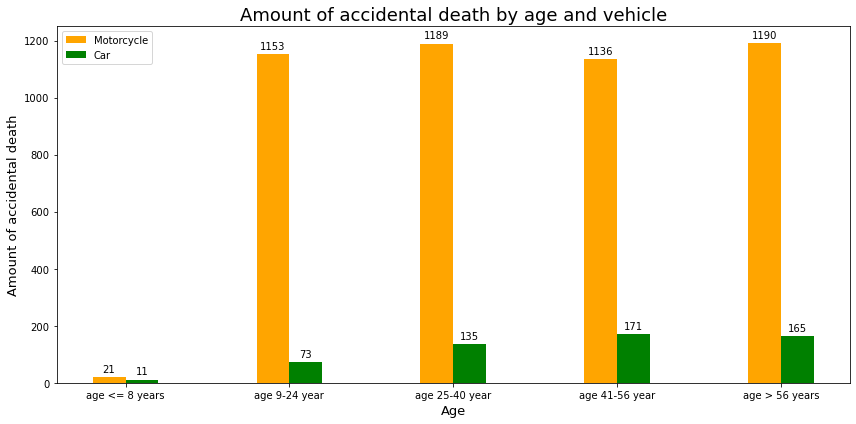

In [13]:
baby_motor = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')& (select_year22['Age_group']== 'ช่วงอายุไม่เกิน 8 ปี')]
baby_car = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')& (select_year22['Age_group']== 'ช่วงอายุไม่เกิน 8 ปี')]
count_baby_m = baby_motor.count()
count_baby_c = baby_car.count()

genz_motor = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')& (select_year22['Age_group']== 'อายุ 9-24 ปี')]
genz_car = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')& (select_year22['Age_group']== 'อายุ 9-24 ปี')]
count_genz_m = genz_motor.count()
count_genz_c = genz_car.count()

geny_motor = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')& (select_year22['Age_group']== 'อายุ 25-40 ปี')]
geny_car = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')& (select_year22['Age_group']== 'อายุ 25-40 ปี')]
count_geny_m = geny_motor.count()
count_geny_c = geny_car.count()

genx_motor = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')& (select_year22['Age_group']== 'อายุ 41-56 ปี')]
genx_car = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')& (select_year22['Age_group']== 'อายุ 41-56 ปี')]
count_genx_m = genx_motor.count()
count_genx_c = genx_car.count()

boomer_motor = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')& (select_year22['Age_group']== 'ช่วงอายุมากกว่า 56 ปี')]
boomer_car = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')& (select_year22['Age_group']== 'ช่วงอายุมากกว่า 56 ปี')]
count_boomer_m = boomer_motor.count()
count_boomer_c = boomer_car.count()

#plot
lst_gen = ['age <= 8 years','age 9-24 year','age 25-40 year','age 41-56 year','age > 56 years']
lst_gen_m = [count_baby_m[0],count_genz_m[0],count_geny_m[0],count_genx_m[0],count_boomer_m[0]]
lst_gen_c = [count_baby_c[0],count_genz_c[0],count_geny_c[0],count_genx_c[0],count_boomer_c[0]]

X_len = np.arange(len(lst_gen))

fig,ax = plt.subplots(figsize=(12,6))
#plt.figure(figsize=(18,6))

rects1 = ax.bar(X_len-0.1,lst_gen_m,0.2,label = 'Motorcycle',color = 'orange')
rects2 = ax.bar(X_len+0.1,lst_gen_c,0.2,label = 'Car',color = 'green')

plt.title('Amount of accidental death by age and vehicle', fontsize = 18)
plt.xlabel('Age',fontsize = 13)
plt.ylabel('Amount of accidental death',fontsize = 13)
plt.xticks(X_len,lst_gen)
ax.legend()
#plt.plot(X_len,lst_gen_m,marker = 'o',linewidth=2.0,color = 'black')
#plt.plot(X_len,lst_gen_c,marker = 'o',linewidth=2.0,color = 'red')
#plt.scatter(X_len,motor)

def plot_test(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plot_test(rects1)
plot_test(rects2)

fig.tight_layout()
plt.show()

In [17]:
#วิเคราะห์เฉพาะปี 2022 
#โดยวิเคราะห์รายเดือนจำแนกตามยาพาหนะ
select_year22 = df.loc[df["DEAD_YEAR"]==2022]
motor_jan22 = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')&(select_year22['MonthDate']=='January')]
car_jan22 = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')&(select_year22['MonthDate']=='January')]
count_jan_motor = motor_jan22.count()
count_jan_car = car_jan22.count()

motor_feb22 = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')&(select_year22['MonthDate']=='February')]
car_feb22 = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')&(select_year22['MonthDate']=='February')]
count_feb_motor = motor_feb22.count()
count_feb_car = car_feb22.count()

motor_march22 = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')&(select_year22['MonthDate']=='March')]
car_march22 = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')&(select_year22['MonthDate']=='March')]
count_march_motor = motor_march22.count()
count_march_car = car_march22.count()

motor_april22 = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')&(select_year22['MonthDate']=='April')]
car_april22 = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')&(select_year22['MonthDate']=='April')]
count_april_motor = motor_april22.count()
count_april_car = car_april22.count()

motor_may22 = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')&(select_year22['MonthDate']=='May')]
car_may22 = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')&(select_year22['MonthDate']=='May')]
count_may_motor = motor_may22.count()
count_may_car = car_may22.count()

motor_june22 = select_year22.loc[(select_year22['Vehicle']=='รถจักรยานยนต์')&(select_year22['MonthDate']=='June')]
car_june22 = select_year22.loc[(select_year22['Vehicle']=='รถยนต์')&(select_year22['MonthDate']=='June')]
count_june_motor = motor_june22.count()
count_june_car = car_june22.count()


select_year22

,DEAD_YEAR,Age,Sex,AccProv,Vehicle,MonthDate,Age_group
223545,2022,56.0,Male,กระบี่,รถจักรยานยนต์,January,
223546,2022,66.0,Male,กระบี่,รถจักรยานยนต์,January,
223547,2022,21.0,Male,กระบี่,รถยนต์,January,
223549,2022,22.0,Male,กระบี่,รถจักรยานยนต์,January,
223550,2022,58.0,Male,กระบี่,รถจักรยานยนต์,January,
...,...,...,...,...,...,...,...
232160,2022,21.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,
232163,2022,67.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,
232165,2022,62.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,
232166,2022,29.0,Male,อุบลราชธานี,รถจักรยานยนต์,June,


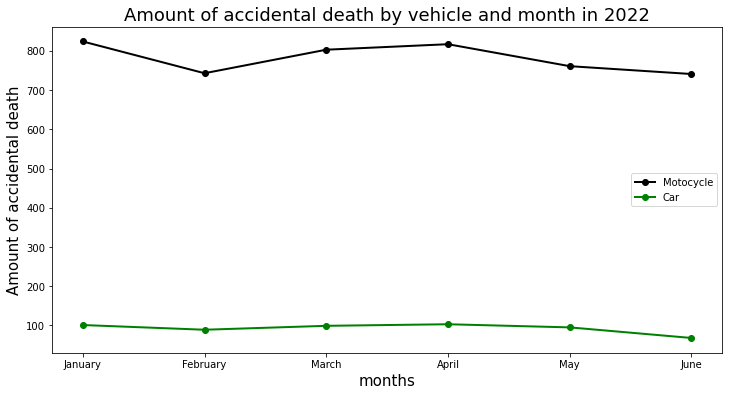

In [15]:
#วิเคราะห์เฉพาะปี 2022 
lst_motor22 = [count_jan_motor[0],count_feb_motor[0],count_march_motor[0],count_april_motor[0],count_may_motor[0],count_june_motor[0]]
lst_car22 = [count_jan_car[0],count_feb_car[0],count_march_car[0],count_april_car[0],count_may_car[0],count_june_car[0]]

x = [ 'January','February','March','April','May','June']
X_len = np.arange(len(x))

fig,ax = plt.subplots(figsize=(12,6))

plt.plot(X_len,lst_motor22,marker = 'o',linewidth=2.0,color = 'black',label = 'Motocycle')
plt.plot(X_len,lst_car22,marker = 'o',linewidth=2.0,color = 'green',label = 'Car')
plt.title('Amount of accidental death by vehicle and month in 2022', fontsize = 18)
plt.xlabel('months',fontsize = 15)
plt.ylabel('Amount of accidental death',fontsize = 15)
ax.legend(loc = 'center right')
plt.xticks(X_len,x)
plt.show()

